In [1]:
from pathlib import Path as PPath
import re
from genetic.data_definitions import CartesianPoint, Mapa
from genetic.visualization import plot_map
import random
import itertools

In [2]:
def sgl_read_areas(lines):
    """From the map file definition reads each area"""

    lines = iter(lines)
    next(lines)  # <number of polygons>
    next(lines)  # 20

    areas = []

    for line in lines:
        Xs = [float(n) for n in re.sub(r"\n", "", next(lines)).split(",")]
        Ys = [float(n) for n in re.sub(r"\n", "", next(lines)).split(",")]

        areas.append([CartesianPoint(x, y) for x, y in zip(Xs, Ys)])

    return areas


def read_sgl(path, **kwargs):
    with open(path, "r") as f:
        lines = f.readlines()
        map = Mapa(
            wp_ori, wp_des, sgl_read_areas(lines), **kwargs
        )  # inflation_rate=1, mode='scalar'
    return map


In [3]:
# test path
# pathlist = PPath('./maps/NonRegular').glob("**/*.sgl")

# for i, p in enumerate(pathlist):
#     print(p)
    
# print('Qty: ', i+1)

In [4]:
wp_ori = CartesianPoint(0, 0)
wp_des = CartesianPoint(0, -10)

In [5]:
pathlist = PPath('./maps/NonRegular').glob("**/*.sgl")

maps = []

for path in pathlist:
    maps.append(read_sgl(path))

In [6]:
def get_type(percent):
    if random.random() < percent:
        return 'b'
    else:
        return 'n'

In [34]:
def vis_mapa_2(mapa, route=None, tipos=None, **qwargs):
    areas = [area for area in itertools.chain(mapa.areas_n, mapa.areas_n_inf)]
    #_tipos = [get_type(.1) for _ in range(int(len(areas)/2))]
    #tipos = []
    tipos.extend(tipos)
    #tipos.extend(_tipos)

    kwargs = {
        "areas": areas,
        "labels": tipos,
        "origem": mapa.origin,
        "destino": mapa.destination,
        #"texts": [i for i in range(0,20)]
    }

    if route:
        kwargs["waypoints"] = route

    kwargs.update(qwargs)

    plot_map(**kwargs)
    
    #return _tipos

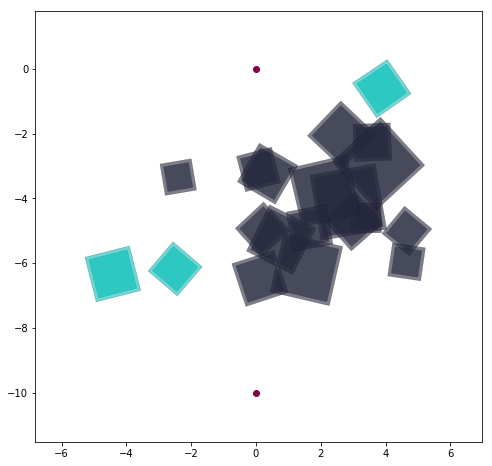

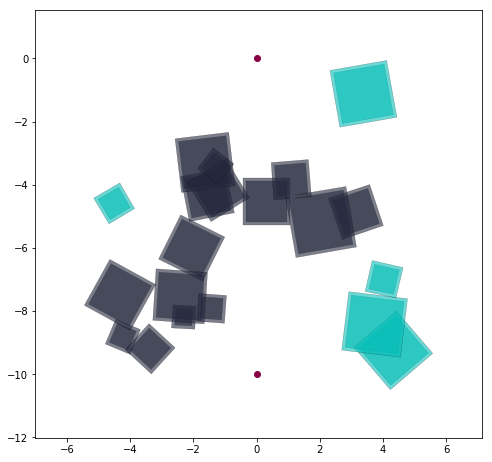

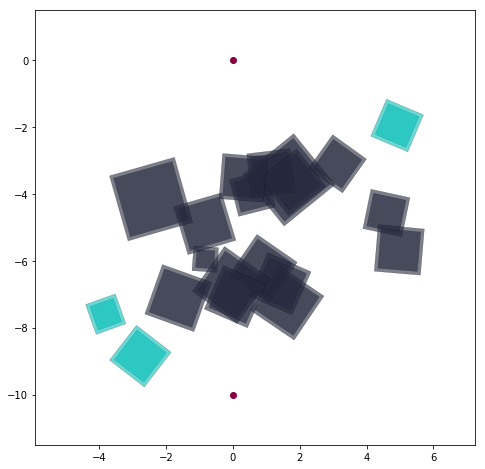

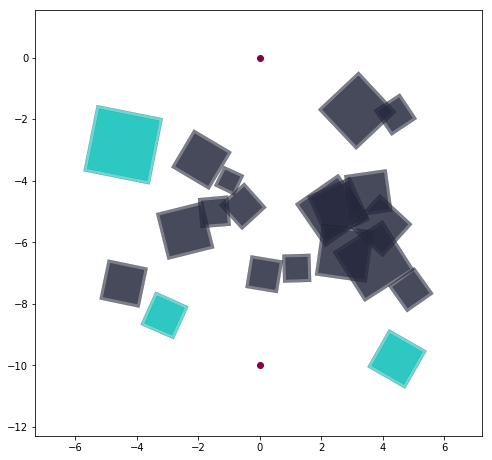

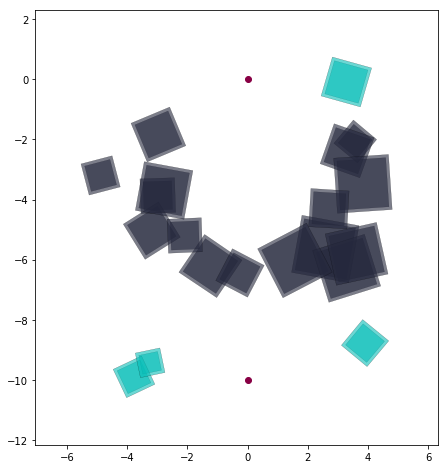

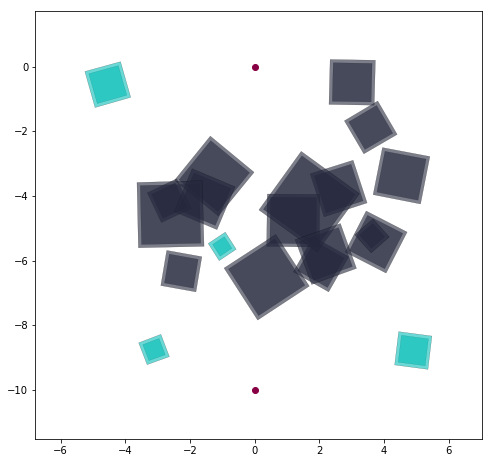

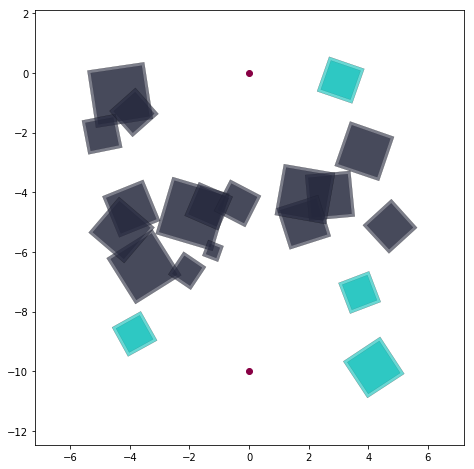

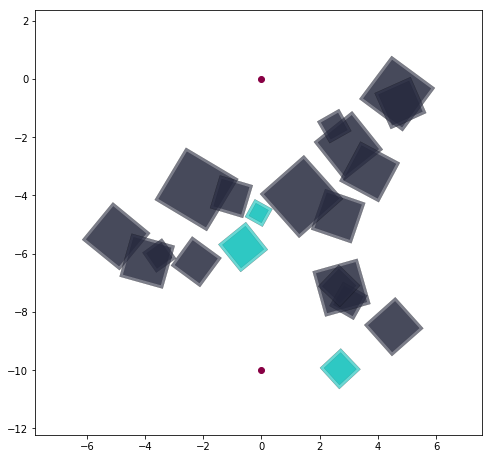

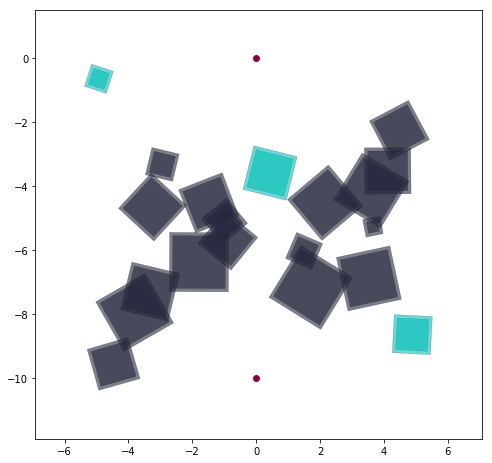

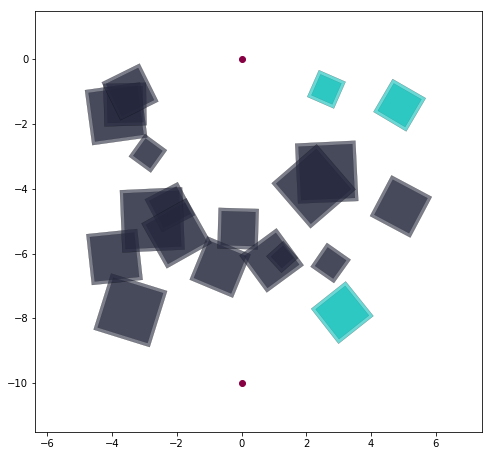

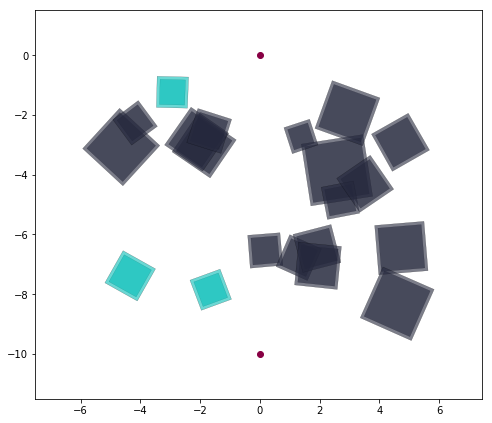

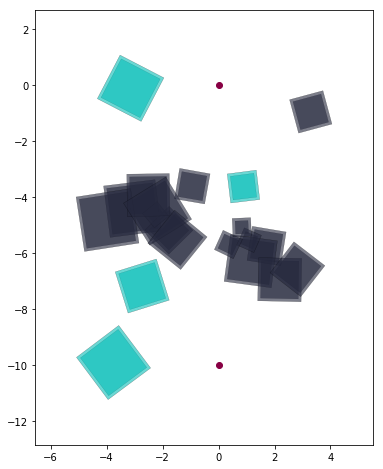

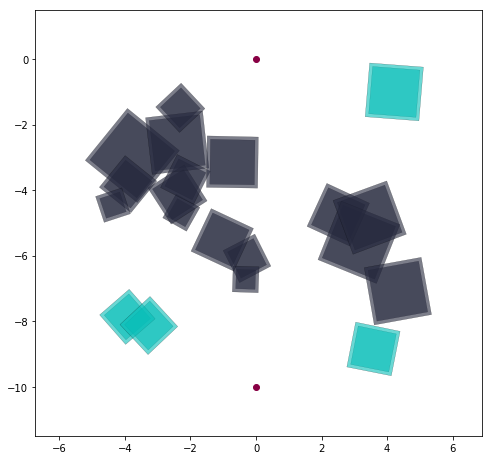

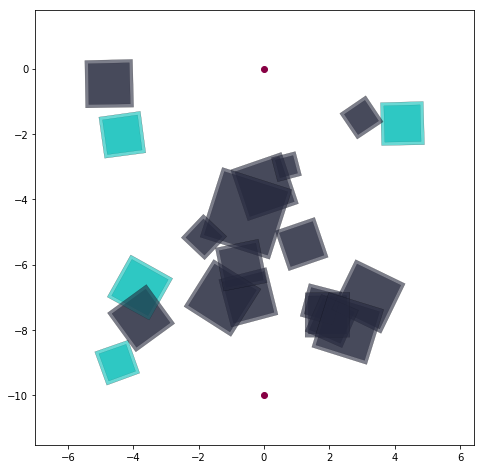

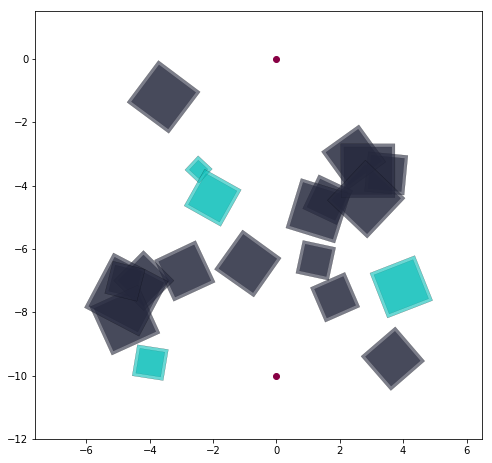

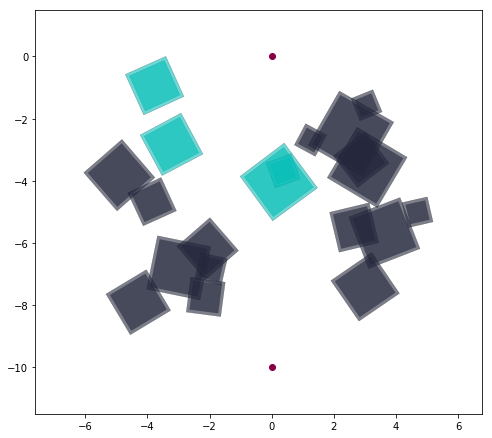

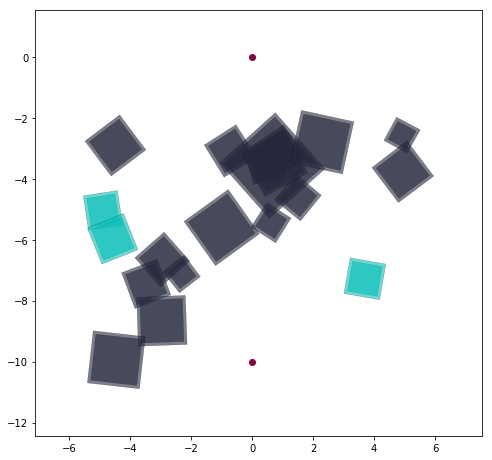

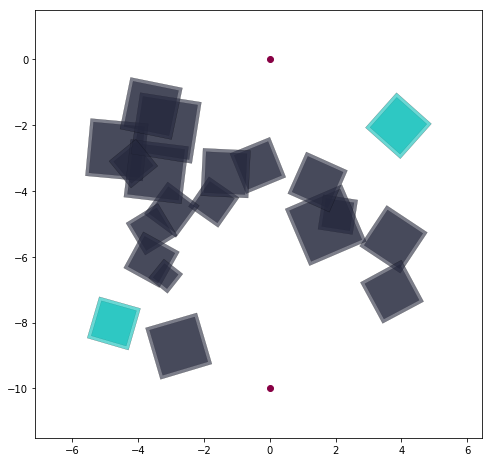

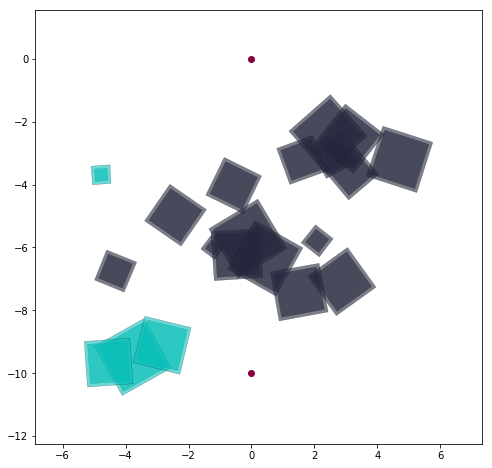

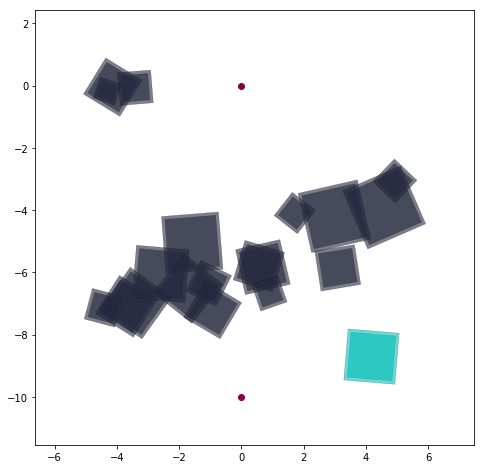

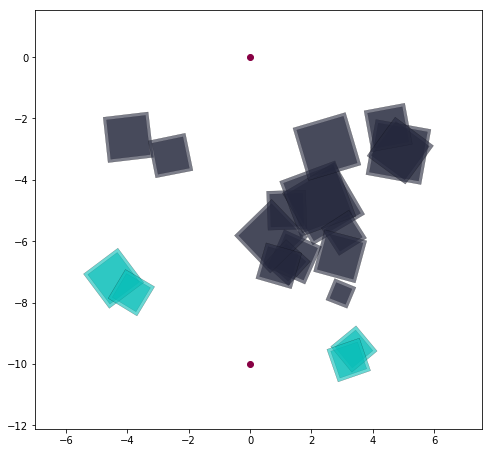

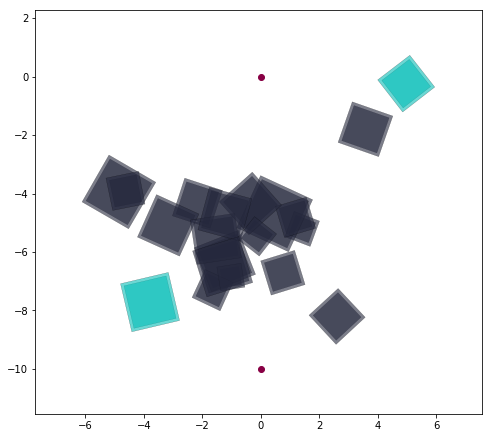

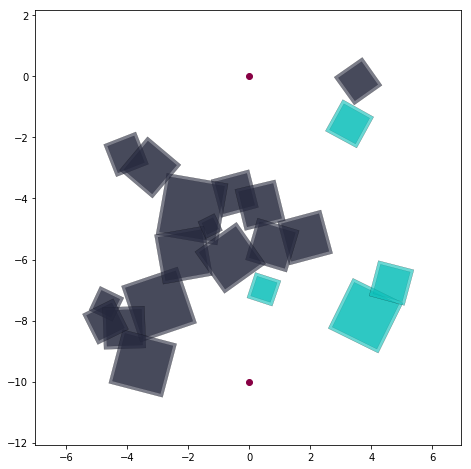

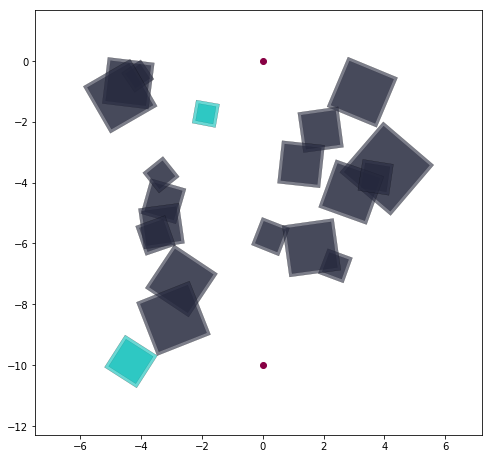

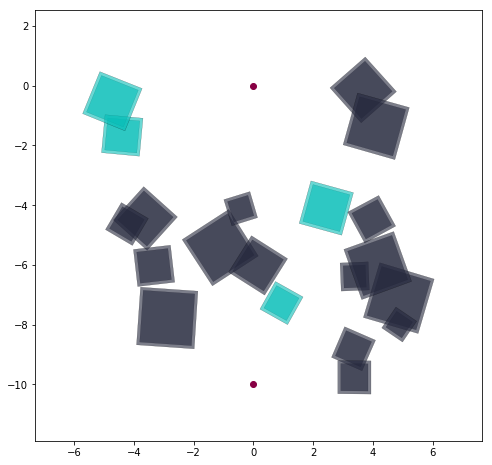

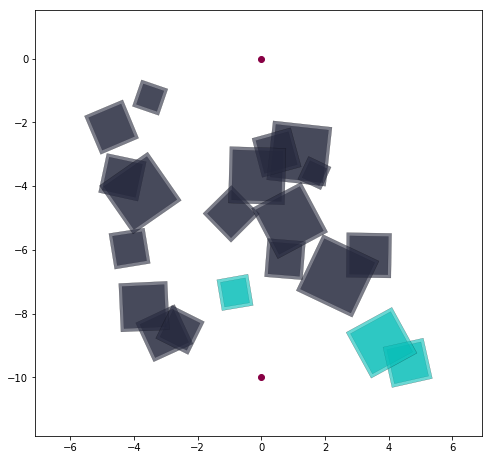

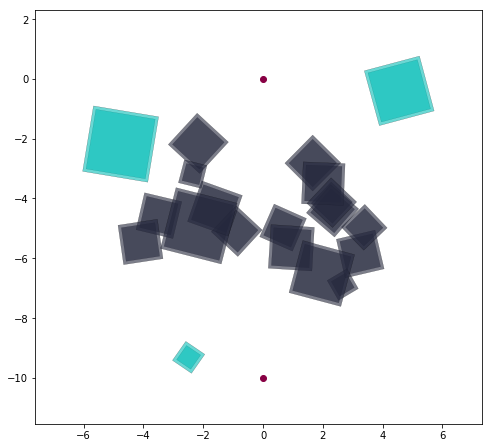

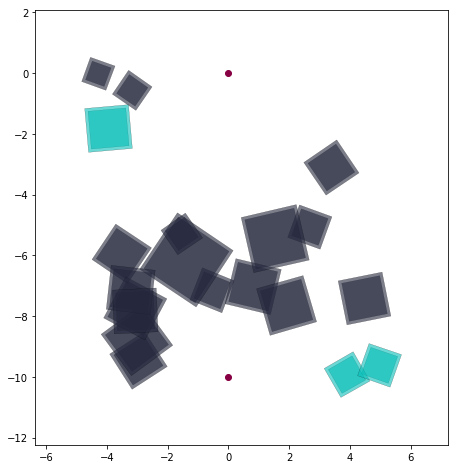

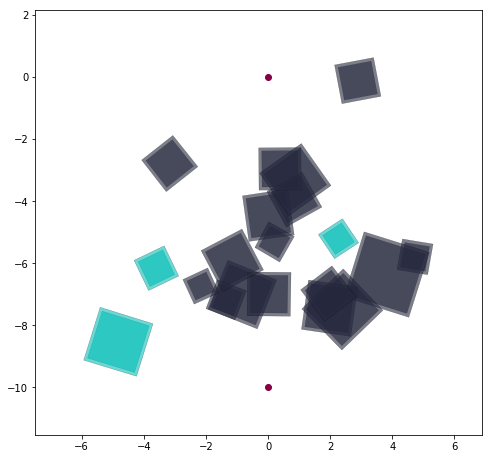

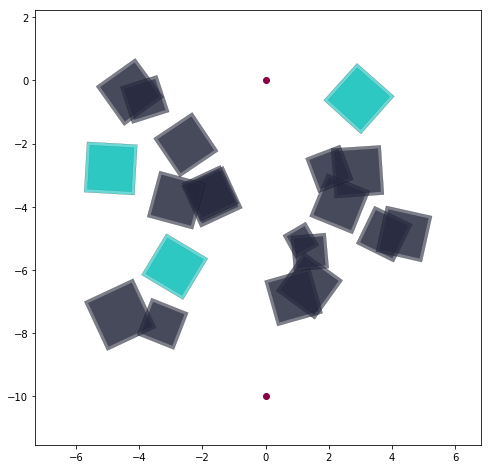

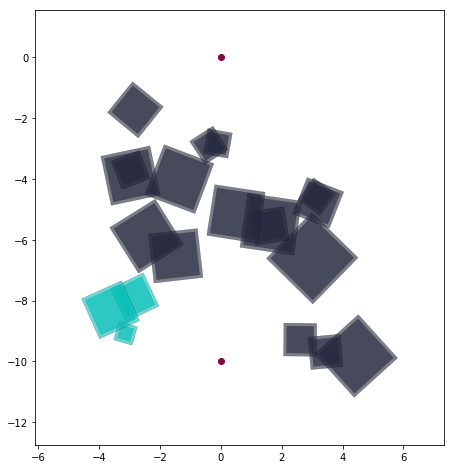

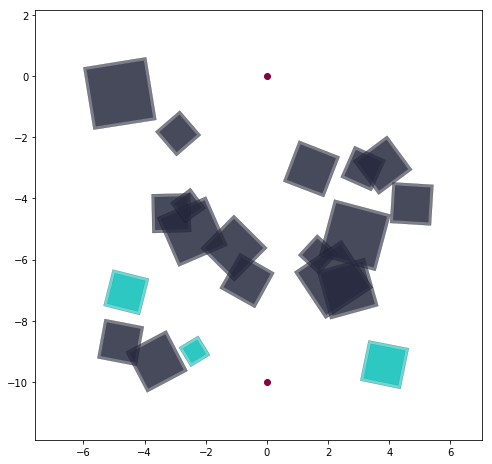

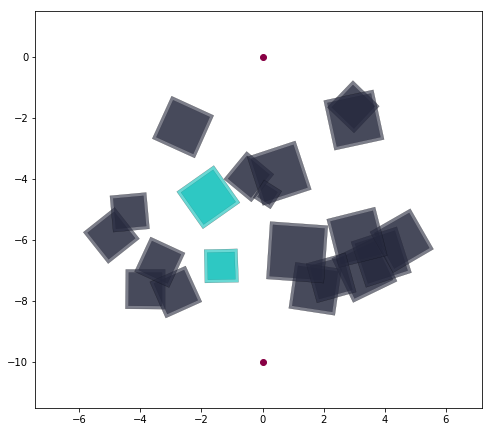

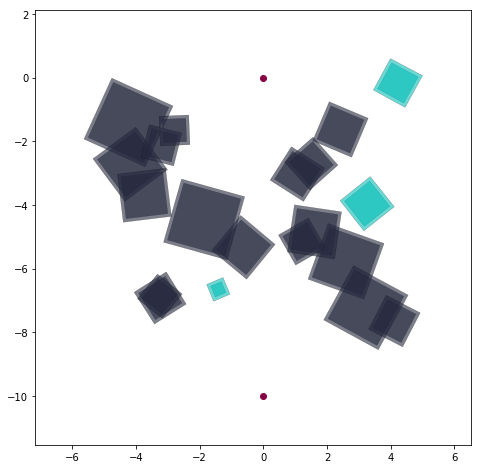

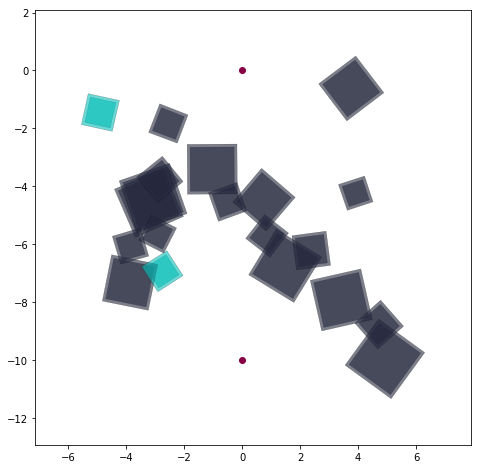

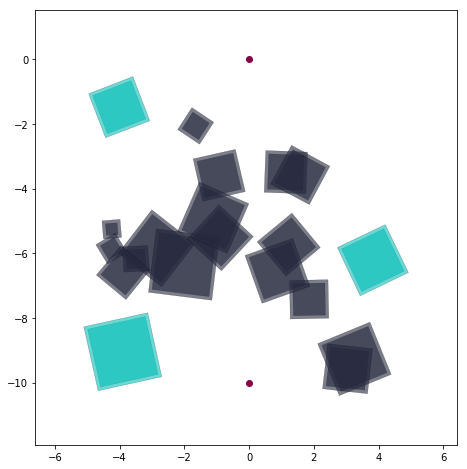

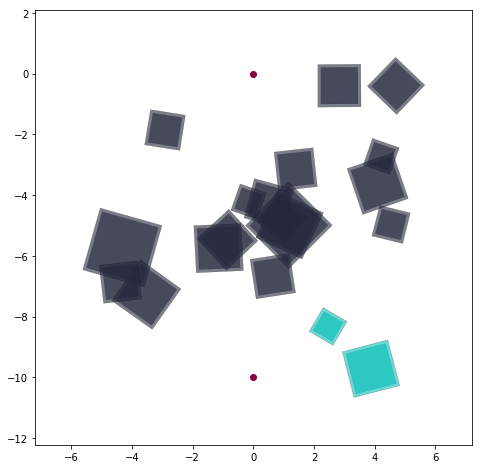

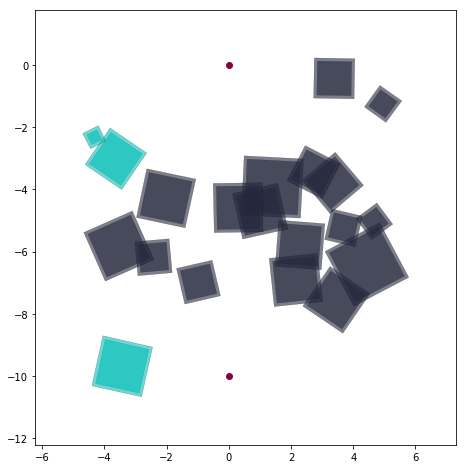

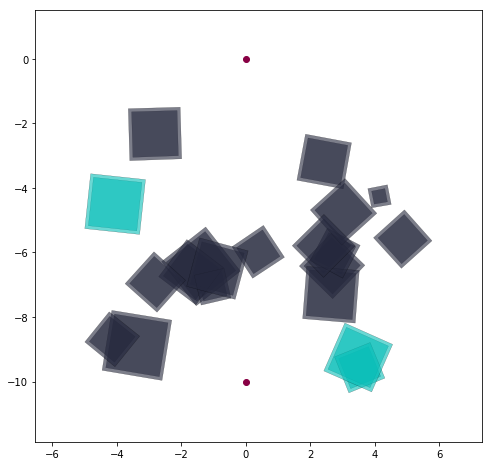

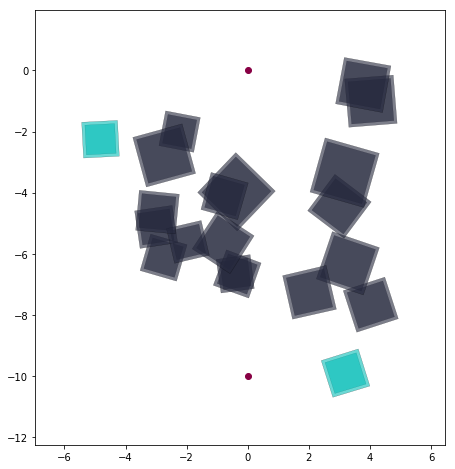

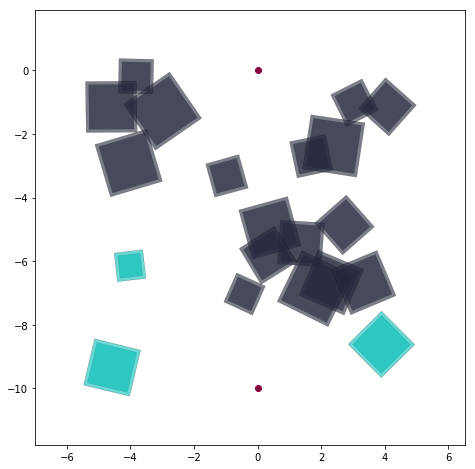

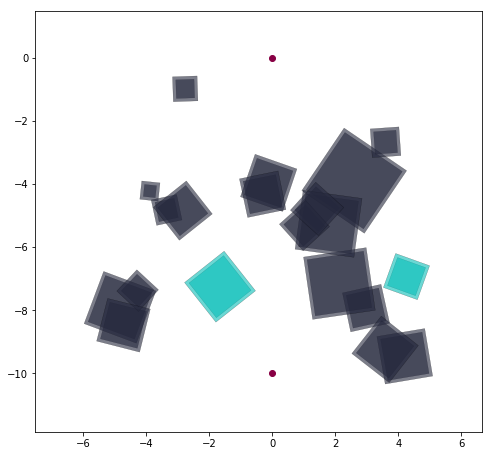

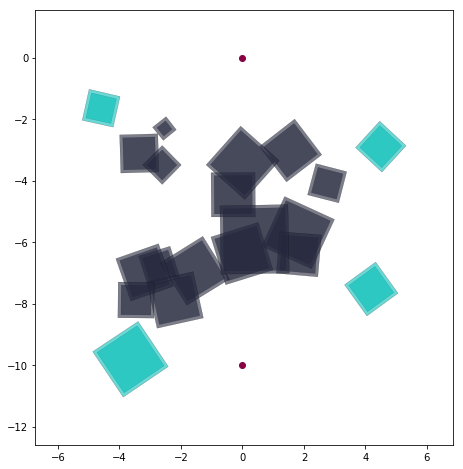

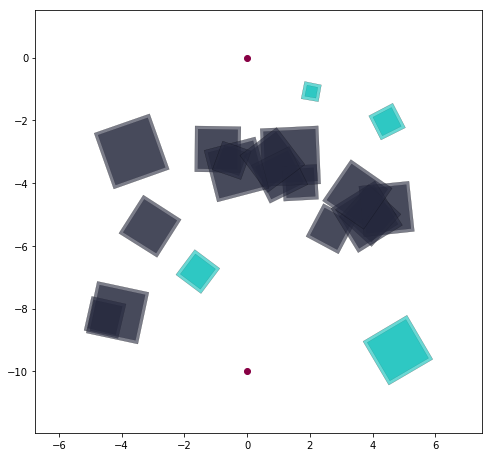

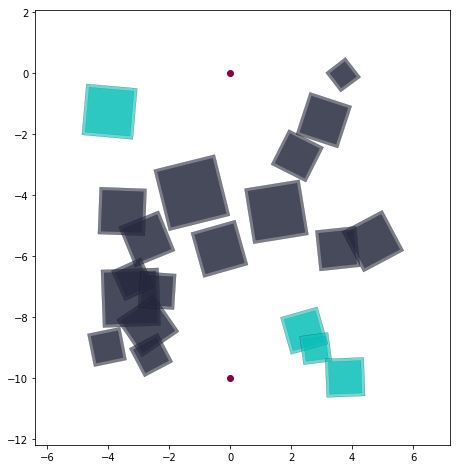

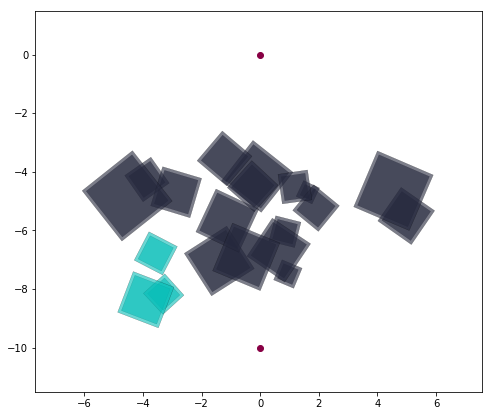

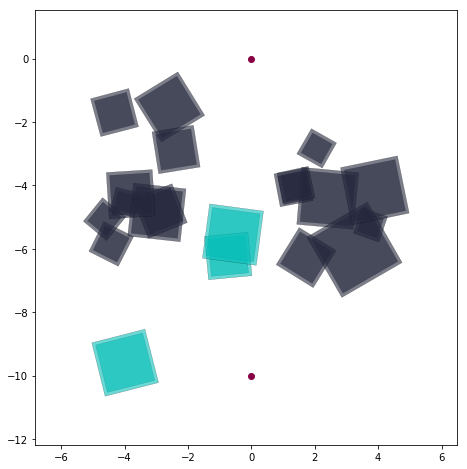

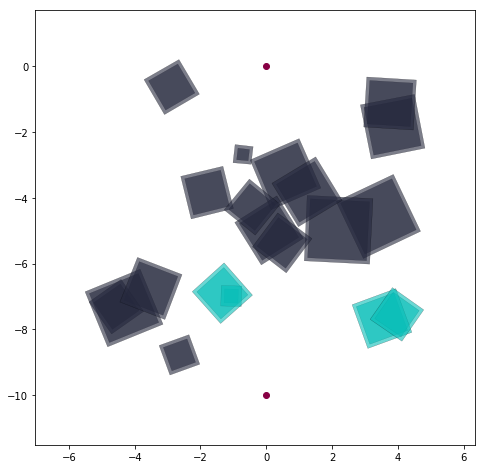

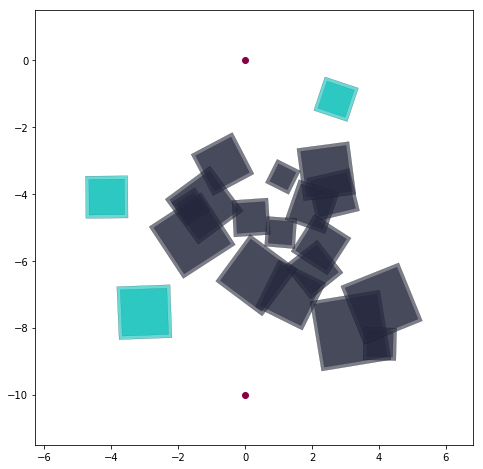

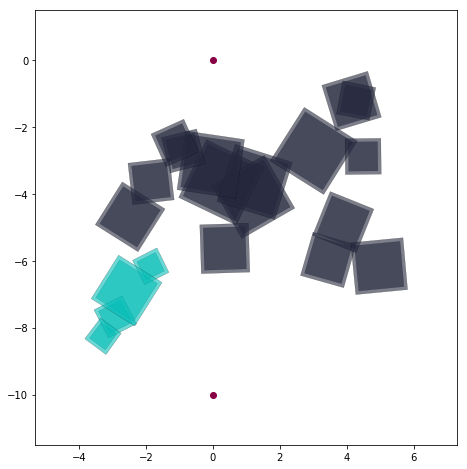

In [43]:
i = 0
for map, tipo in zip(maps, tipos):
    vis_mapa_2(map, tipos=tipo, save=f'b_n_{i:02}.png')
    i += 1

In [27]:
with open('./maps/bonus_regions.txt', 'r') as f:
    labels = []
    for i in f:
        map_labels = []
        for j in re.sub('\n','',i).split(','):
            map_labels.append(int(j))
        labels.append(map_labels)

In [30]:
tipos = []
for i,y in zip(range(50), labels):
    map_tipos = []
    for j in range(20):
        if j in y:
            map_tipos.append('b')
        else:
            map_tipos.append('n')
    tipos.append(map_tipos)

In [31]:
tipos

[['n',
  'n',
  'b',
  'n',
  'n',
  'n',
  'n',
  'n',
  'b',
  'b',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['n',
  'n',
  'n',
  'n',
  'n',
  'b',
  'b',
  'n',
  'n',
  'n',
  'b',
  'n',
  'b',
  'b',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['b',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'b',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'b',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['n',
  'b',
  'n',
  'n',
  'n',
  'n',
  'b',
  'b',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n'],
 ['n',
  'n',
  'n',
  'n',
  'b',
  'n',
  'n',
  'b',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'b',
  'b'],
 ['n',
  'n',
  'n',
  'n',
  'b',
  'b',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'b',
  'n',
  'b',
  'n',
  'n'],
 ['n',
  'n',
  'n',
  'b',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'b',
  'b',
  'n',
  'n',
  'n',
  'n',
  'b',
  'n',
  'n',
  'n'],
 ['b',
  'n',